In [1]:
# Rubens Guedes Kaiserman
# DRE: 122119151

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# 1) Usar a função f(x) = sin(x)
# 2) No intervalo [0, 2pi]
# h = 2pi/2^n
# 3) Calcular a aproximação da derivada de f(x) para todos os pontos da malha
# Plotar o matplotlib junto com a solução exata
# 4) Plotar o erro para x = pi

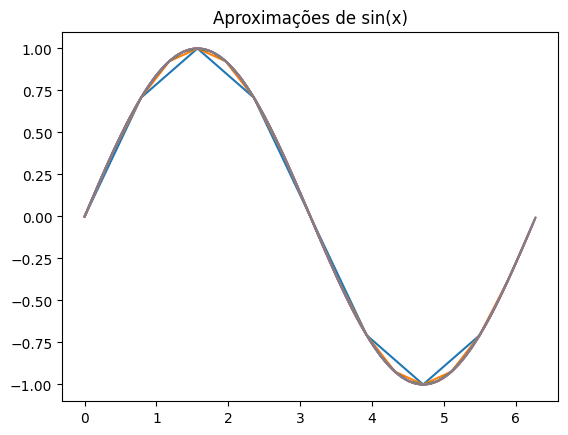

In [4]:
# Calculando Aproximações para o gráfico da função sin(x) no intervalo fixado com os espaçamentos desejados (apenas para visualização)

for n in range(3, 11):

    x = np.arange(0, 2*np.pi, 2*np.pi/(2**n))
    y = np.sin(x)
    
    plt.plot(x, y)

plt.title("Aproximações de sin(x)")
plt.show()

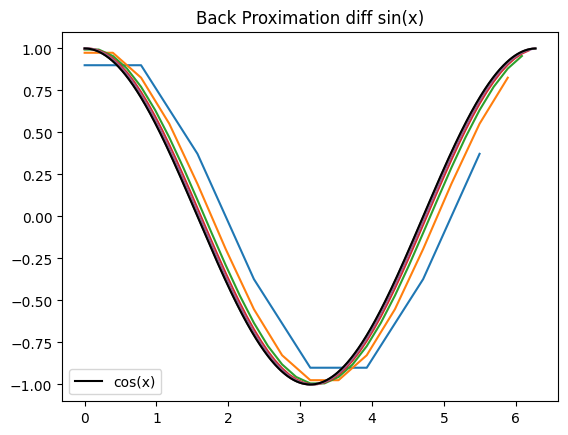

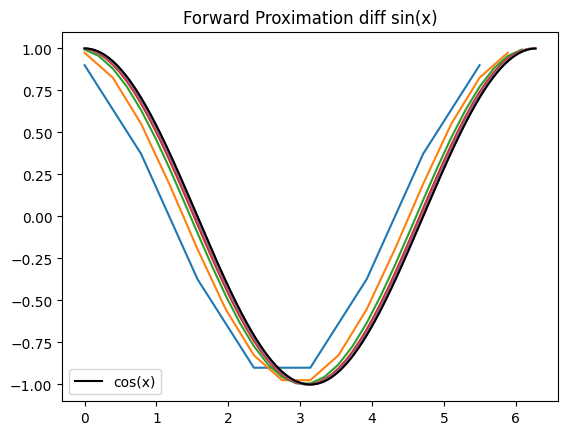

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]


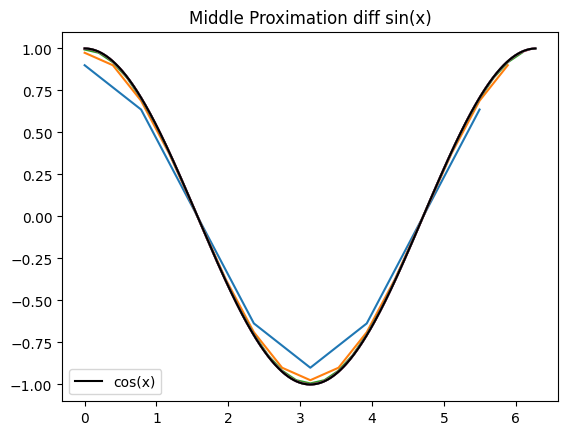

In [5]:
# Back Aproximation
for n in range(3, 11):
    h = (2*np.pi/(2**(n)))
    x_arr = np.arange(0, 2*np.pi, h)
    y = [(np.sin(x) - np.sin(x - h))/h for x in x_arr]
    
    
    plt.plot(x_arr, y)

y = np.cos(x_arr)
plt.plot(x_arr, y, color="black", label="cos(x)")

plt.legend()
plt.title("Back Proximation diff sin(x)")
plt.show()

# Forward Aproximation
for n in range(3, 11):
    h = (2*np.pi/(2**(n)))
    x_arr = np.arange(0, 2*np.pi, h)
    y = [(np.sin(x + h) - np.sin(x))/h for x in x_arr]
    
    
    plt.plot(x_arr, y)

y = np.cos(x_arr)
plt.plot(x_arr, y, color="black", label="cos(x)")

plt.legend()
plt.title("Forward Proximation diff sin(x)")
plt.show()

# Middle Aproximation
for n in range(3, 11):
    h = (2*np.pi/(2**(n)))
    x_arr = np.arange(0, 2*np.pi, h)
    y = [(np.sin(x + h) - np.sin(x - h))/(2 * h) for x in x_arr]
    
    if len(x_arr) == 8:
        print(x_arr)
    
    plt.plot(x_arr, y)

y = np.cos(x_arr)
plt.plot(x_arr, y, color="black", label="cos(x)")

plt.legend()
plt.title("Middle Proximation diff sin(x)")
plt.show()

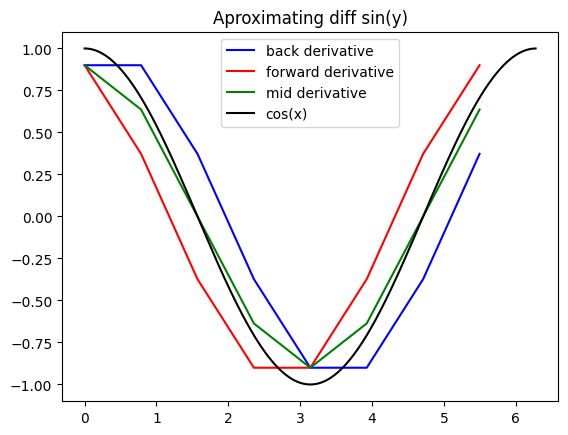

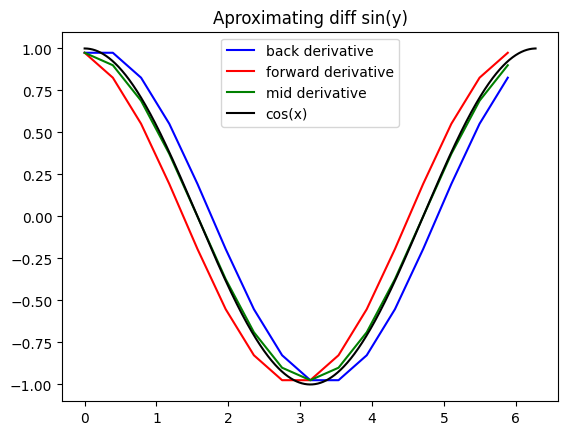

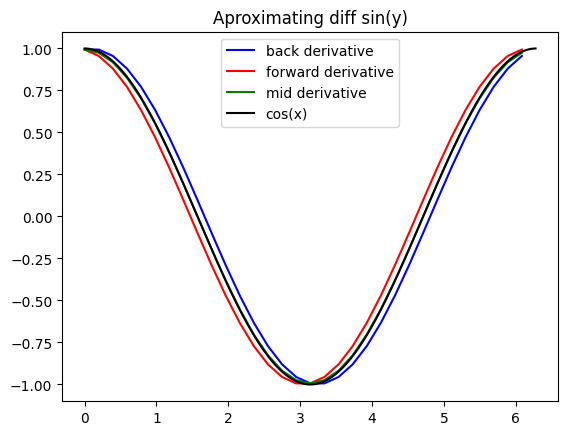

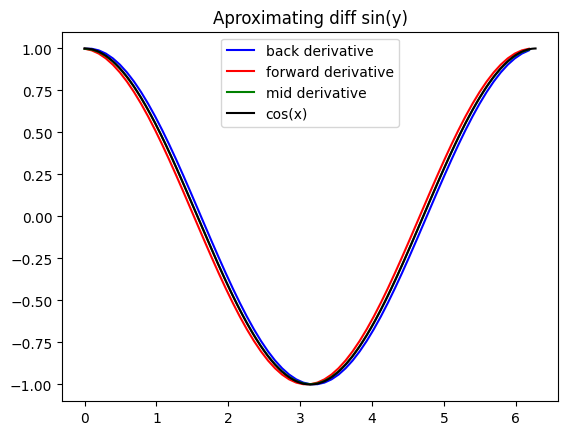

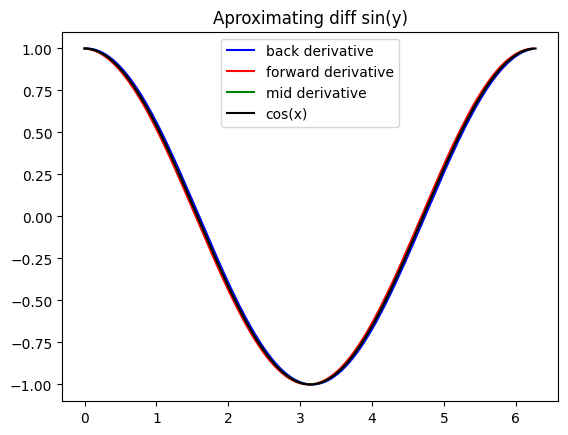

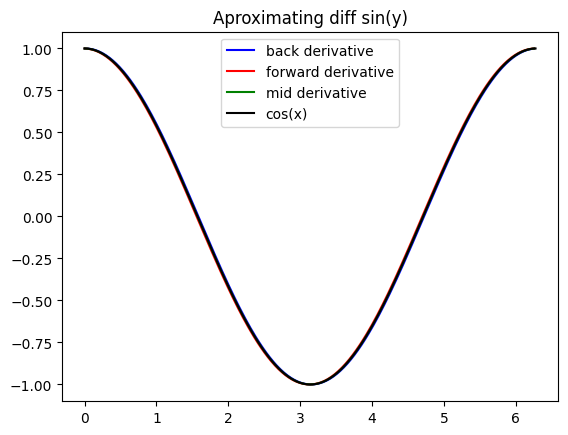

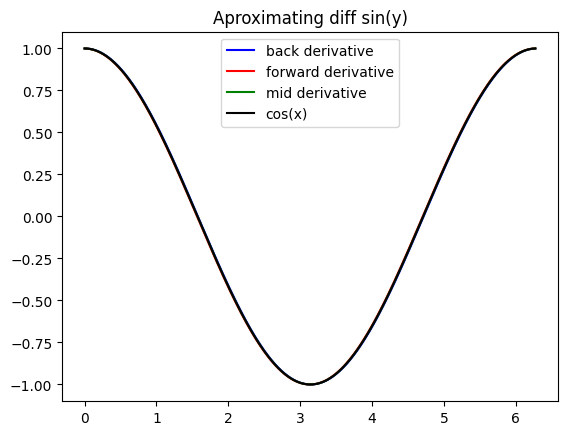

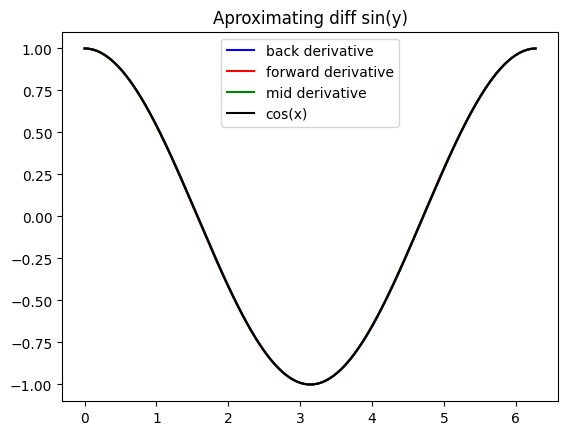

In [6]:
# Para fins de ainda melhor visualização. Plotemos 7 gráficos comparando os 3 métodos
h = (2*np.pi/(2**(10)))
x_arr_total = np.arange(0, 2*np.pi, h)
y_cos = np.cos(x_arr_total)

for n in range(3, 11):
    h = (2*np.pi/(2**(n)))
    x_arr = np.arange(0, 2*np.pi, h)
    
    back_y = [(np.sin(x) - np.sin(x - h))/h for x in x_arr]
    for_y = [(np.sin(x + h) - np.sin(x))/h for x in x_arr]
    mid_y = [(np.sin(x + h) - np.sin(x - h))/(2 * h) for x in x_arr]
    
    plt.plot(x_arr, back_y, color="blue", label="back derivative")
    plt.plot(x_arr, for_y, color="red", label="forward derivative")
    plt.plot(x_arr, mid_y, color="green", label="mid derivative")
    
    
    plt.plot(x_arr_total, y_cos, color="black", label="cos(x)")

    plt.legend()
    plt.title("Aproximating diff sin(y)")
    plt.show()

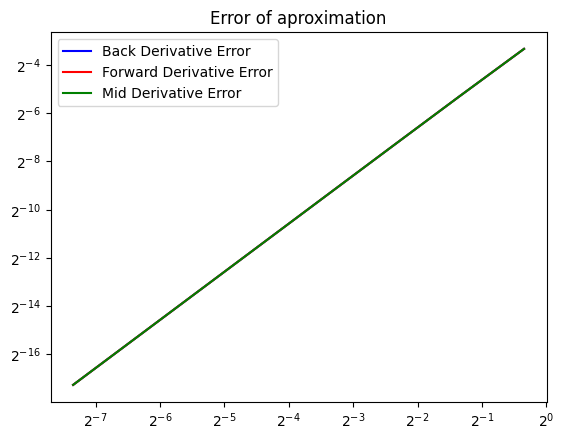

In [10]:
# Agora Calculemos o erro para x = pi

err_back = []
err_for = []
err_mid = []
steps = []

for n in range(3, 11):
    h = (2*np.pi/(2**(n)))
    x = np.pi
    
    back_y = (np.sin(x) - np.sin(x - h))/h
    for_y = (np.sin(x + h) - np.sin(x))/h
    mid_y = (np.sin(x + h) - np.sin(x - h))/(2 * h)
    
    val = np.cos(x)
    err_back.append(abs(back_y - val))
    err_for.append(abs(for_y - val))
    err_mid.append(abs(mid_y - val))
    steps.append(h)

plt.plot(steps, err_back, color="blue", label="Back Derivative Error")
plt.plot(steps, err_for, color="red", label="Forward Derivative Error")
plt.plot(steps, err_mid, color="green", label="Mid Derivative Error")

plt.xscale("log", base=2)
plt.yscale("log", base=2)

plt.legend()
plt.title("Error of aproximation")
plt.show()

Bem legal a coincidência do erro em pi ser igual pra todos os métodos.

Mas Fica a observação de que essa é uma característica desse valor em especial e, dado que sin(x) é uma função ciclíca, de suas respectivas repetições de ciclo. Leia-se valores do tipo pi + k * 2pi para k pertencente aos inteiros.

Claramente se escolhermos um outro ponto, nosso erro será diferente e se comportará como esperado onde o midpoint decresce bem mais rápidamente

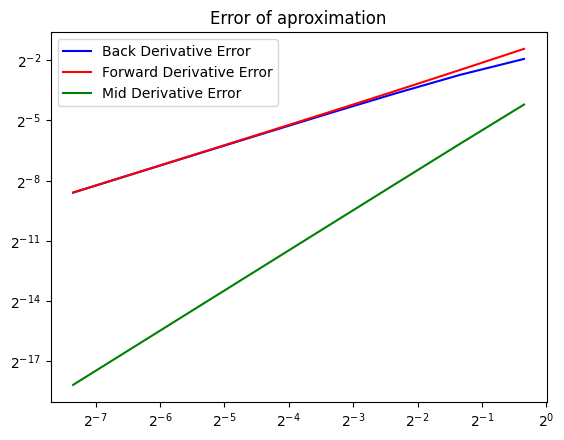

In [11]:
# Agora Calculemos o erro para x = pi

err_back = []
err_for = []
err_mid = []
steps = []

for n in range(3, 11):
    h = (2*np.pi/(2**(n)))
    x = np.pi + 1
    
    back_y = (np.sin(x) - np.sin(x - h))/h
    for_y = (np.sin(x + h) - np.sin(x))/h
    mid_y = (np.sin(x + h) - np.sin(x - h))/(2 * h)
    
    val = np.cos(x)
    err_back.append(abs(back_y - val))
    err_for.append(abs(for_y - val))
    err_mid.append(abs(mid_y - val))
    steps.append(h)

plt.plot(steps, err_back, color="blue", label="Back Derivative Error")
plt.plot(steps, err_for, color="red", label="Forward Derivative Error")
plt.plot(steps, err_mid, color="green", label="Mid Derivative Error")

plt.xscale("log", base=2)
plt.yscale("log", base=2)

plt.legend()
plt.title("Error of aproximation")
plt.show()

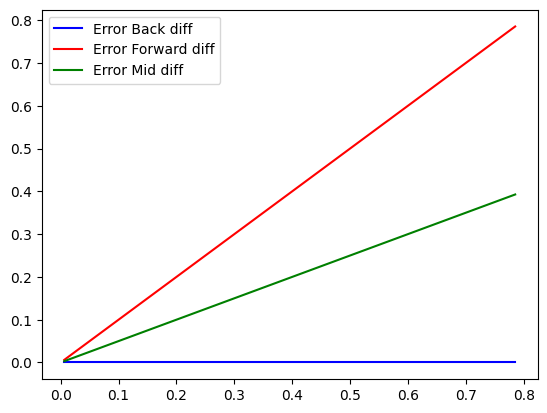

In [21]:
# Questão Bônus it is

def f(x):
    if 0 <= x < np.pi:
        return 0
    
    if np.pi <= x <= 2 * np.pi:
        return (x - np.pi)**2
    

# Vamos trabalhar no intervalo [0, 2pi]

# A derivada analítica é 2(x - pi) = 2x - 2pi se pi <= x <= 2pi e 0 se 0 <= x < pi

# Vamos usar um h = 2*pi/2^n com 3 <= n <= 10 só porque eu achei uma escala de ordem de grandeza coerente mesmo.

err_back = []
err_for = []
err_mid = []
steps = []
for n in range(3, 11):
    h = (2 * np.pi)/(2**n)
    x = np.pi
    
    back_y = (f(x) - f(x - h))/h
    for_y = (f(x + h) - f(x))/h
    mid_y = (f(x + h) - f(x - h))/(2 * h)   

    # A derivada analítica é 0 em pi, logo
    err_back.append(abs(back_y))
    err_for.append(abs(for_y))
    err_mid.append(abs(mid_y))
    
    steps.append(h)
    
plt.plot(steps, err_back, color="blue", label="Error Back diff")
plt.plot(steps, err_for, color="red", label="Error Forward diff")
plt.plot(steps, err_mid, color="Green", label="Error Mid diff")

plt.legend()
plt.show()

Em tese não foi solicitado que fosse feita uma discussão a respeito dessas aproximações, mas façamos essa discussão mesmo assim.

Os resultados se comportam exatamente como o esperado. (Por que isso é esperado?)
(Por que o Erro do mid ta maior do que o back?)

Acalme-se, é uma propriedade dessa função em específico. O valor da função em todos os pontos anteriores ou iguais a pi é 0. Portanto a diferença entre eles é zero sempre, e portanto independente do h, a derivada dará zero aproximada sempre será zero.

Já o método pegando os valores posteriores, sempre pegará um valor positivo, ou seja a secante é esse valor positivo menos o valor em pi que é zero dividido pelo h, logo, algo positivo. Algo cada vez menor conforme se diminui os passos, mas sempre algo positivo.

Conforme o esperado, a mid é algo exatamente entre os dois. A explicação numérica pra isso é que seria o mesmo valor positivo do forward dividido pelo dobro do h. Implicando que a inclinação da reta é exatamente metade do método forward.